In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats


In [23]:
centers = scipy.stats.norm.rvs(size = (10, 2))
weights = np.ones(centers.shape[0])/centers.shape[0]

(array([8., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.]),
 array([0.1       , 0.10694827, 0.11389654, 0.1208448 , 0.12779307,
        0.13474134, 0.14168961, 0.14863787, 0.15558614, 0.16253441,
        0.16948268, 0.17643095, 0.18337921, 0.19032748, 0.19727575,
        0.20422402, 0.21117228, 0.21812055, 0.22506882, 0.23201709,
        0.23896536, 0.24591362, 0.25286189, 0.25981016, 0.26675843,
        0.27370669, 0.28065496, 0.28760323, 0.2945515 , 0.30149976,
        0.30844803, 0.3153963 , 0.32234457, 0.32929284, 0.3362411 ,
        0.34318937, 0.35013764, 0.35708591, 0.36403417, 0.37098244,
        0.37793071]),
 <BarContainer object of 40 artists>)

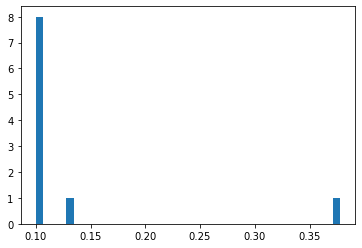

In [24]:
variances = scipy.stats.gamma.rvs(.1,.1, size = (10)) 
plt.hist(variances, bins=40)

In [42]:
def draw_sample_mixture(centers=centers, variances=variances, weights=weights):
    component = np.random.choice(range(len(centers)))
    variate = scipy.stats.norm.rvs ( centers[component], variances[component])
    return(np.hstack((component, variate)))

In [43]:
draw_sample_mixture()


array([8.        , 0.21822352, 0.25889128])

In [54]:
samples_df

,0,1,2
0,8.0,0.275694,0.248689
1,2.0,-1.687184,-0.374257
2,0.0,1.246096,0.944115
3,3.0,0.284249,0.632951
4,6.0,-1.076821,0.167421
...,...,...,...
995,9.0,-0.333322,-0.415722
996,5.0,0.857560,-0.595365
997,0.0,1.378845,0.763510
998,8.0,0.368222,0.055550


In [63]:
samples = np.array([draw_sample_mixture() for j in range(1000)])
samples_df = pd.DataFrame(samples)
samples_df.loc[0]
colors = {0:'black', 1:"brown", 2:'red', 3:"orange", 4:'yellow',
          5:"green", 6:"blue", 7:"purple", 8:"gray", 9:"white"}

In [61]:
samples_df[0]


0      8.0
1      2.0
2      0.0
3      3.0
4      6.0
      ... 
995    9.0
996    5.0
997    0.0
998    8.0
999    0.0
Name: 0, Length: 1000, dtype: float64

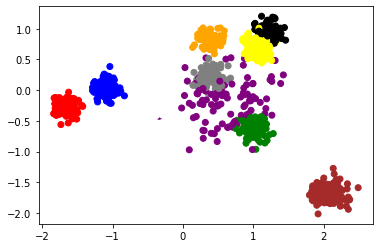

In [64]:
plt.scatter(samples[:,1], samples[:,2], c=samples_df[0].map(colors))



In [65]:
x = np.arange(-6, 6, .01)

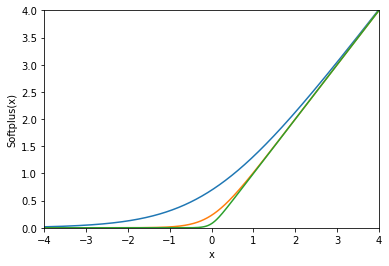

In [102]:
softplus = np.log(1 + np.exp(x))
softplus3 = np.log(1 + np.exp(3*x))/3
softplus9 = np.log(1 + np.exp(9*x))/9
plt.plot(x, softplus)
plt.plot(x, softplus3)
plt.plot(x, softplus9)
plt.xlim(-4,4)
plt.ylim(0,4)
plt.ylabel("Softplus(x)")
plt.xlabel("x")
plt.savefig("softplus.png", dpi=300, bbox_inches ="tight")

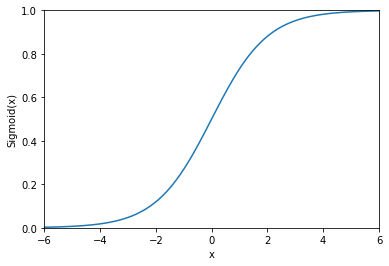

In [101]:
sigmoid = np.exp(x)/ ( 1 + np.exp(x))
sigmoid2 =  0.5*np.exp(x)/ ( 1 +  0.5*np.exp(x))
sigmoid4 = 3 * np.exp(x)/ ( 1 + 3 *np.exp(x))
plt.plot(x, sigmoid)
plt.xlim(-6,6)
plt.ylim(0,1)
plt.ylabel("Sigmoid(x)")
plt.xlabel("x")
plt.savefig("sigmoid.png", dpi=300, bbox_inches ="tight")

Text(0.5, 1.0, '$ {1 / \\lambda} \\exp {-0.1 / \\lambda} $')

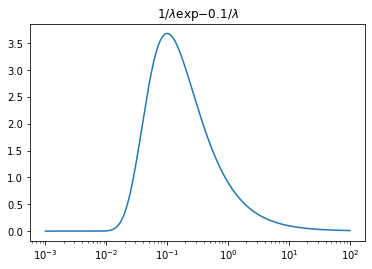

In [108]:
lam = np.arange ( .001, 100, .0001)
expdensity = 1/lam *  np.exp(-0.1 / lam )
plt.semilogx(lam, expdensity)
plt.title( "$ {1 / \lambda} \exp {-0.1 / \lambda} $")

In [92]:
density = 1/(np.exp(-0.01 / lam) - np.exp(-20/lam)) * np.exp(-0.1 / lam )

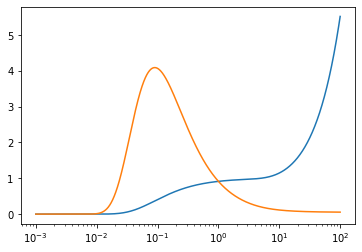

In [94]:
plt.semilogx(lam, density)
plt.semilogx(lam, density/lam)